## Update Stop Words

In [1]:
from sklearn.feature_extraction import text 

text.ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [3]:
# add network, host names
add_stop_words = ['tucker', 'carlson', 'fox', 'news', 'five', 
                'greg', 'gutfeld', 'dana', 'perino', 'jesse', 'watters', 
                'jeanine', 'pirro', 'geraldo', 'rivera', 'jessica', 'tarlov',
                'harold', 'ford', 'jr', 'ok', 'williams',  'pavlich', 
                'mcdowell', 'juan']

In [4]:
# add custom words to the English set
full_stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

## Define COVID terms
Define groups of terms referring to COVID, vaccines, masks

In [5]:
# covid terms -- Lori added sars, sars-, sars-cov-2
covid_terms = ['coronavirus', 'covid', 'covid-19', 'covid-', 
                'covid19', 'virus', 'sars', 'sars-', 'sars-cov-2']

# vaccine terms -- Lori added pfizer, moderna, johnson
vaccine_terms = ['vaccine', 'vaccination', 'vaccinated', 'mrna', 'booster', 'vax', 'vaxx', 
                'vaxxed', 'pfizer', 'moderna', 'johnson']

# mask terms -- Lori added n95 and kn95
mask_terms = ['mask', 'masking', 'n95', 'kn95']

# other COVID-related terms (can choose to use or not)
other_terms = ['china', 'wuhan', 'mandate', 'pandemic', 'epidemic', 'virus',
                'distancing', 'spread', 'immunity', 'incubation', 'quarantine']

all_covid_terms = covid_terms + other_terms

## Load Data

In [6]:
#import libraries
import glob 
import os
import matplotlib.pyplot as plt
import numpy as np
import string
import re

#step 1: get a list of file names to read into the dataset
repo_path = os.path.dirname(os.getcwd()) #get the correct file path 
tc_paths = glob.glob(repo_path + "/data/01-raw/tucker_carlson/*.txt") #the paths for the tucker carlson transcript files
tf_paths = glob.glob(repo_path + '/data/01-raw/the_five/*.txt') #the paths for the five transcript files

all_conservative_files = tc_paths + tf_paths #all conservative transcripts

## Read files, clean text, store cleaned transcripts and sentences

In [7]:
text_transcripts = [] # container for transcript text
text_sentences = [] # container for sentence text
covid_counts_transcripts = [] # container for transcript covid mention counts
covid_counts_sentences = [] # container for sentence covid mention counts

# read in each transcript, do text cleaning, add text and counts to containers
# split sentences on periods, do text cleaning, add text and counts to containers
# text cleaning is done separately for transcripts and sentences to help split sentences better

#### transcripts as documents
for transcript in all_conservative_files:
    
    # create transcript covid counter
    cov_trans_counter = 0
    
    # read text
    text = open(transcript, encoding = 'utf-8', errors = 'ignore').read().lower()  # Lori ignored a few characters that were not ASCII
    
    ### string cleaning
    # line below replaces periods with spaces because spaces after periods are often missing, then strips extra spaces
    corpus_text = text.replace('\xa0', '').replace('.', ' ').replace('  ', ' ')
    # remove all punctuation
    for c in string.punctuation:
        corpus_text = corpus_text.replace(c, "")
    # remove numbers
    corpus_text = re.sub('\d+', '', corpus_text)
    # remove whitespaces
    corpus_text = " ".join(corpus_text.split())
    
    # add cleaned text to container
    text_transcripts.append(corpus_text)
    
    # add to counter if word in text is in covid terms, add count to container
    for word in corpus_text.split(' '):
        if word in covid_terms:
            cov_trans_counter += 1
    covid_counts_transcripts.append(cov_trans_counter)
    
    
    #### sentences as documents
    for sentence in text.split('.'): # note that splitting on periods is not perfect for identifying sentences
        
        # create sentence covid counter
        cov_sen_counter = 0
        
        ### string cleaning
        corpus_sen = sentence.replace('\xa0', '')
        # remove all punctuation    
        for c in string.punctuation:
            corpus_sen = corpus_sen.replace(c, "")
        # remove numbers            
        corpus_sen = re.sub('\d+', '', corpus_sen)
        # remove whitespaces
        corpus_sen = " ".join(corpus_sen.split())
        
        # add cleaned sentence to container
        text_sentences.append(corpus_sen)
        
        # add to counter if word in sentence is in covid terms, add count to container
        for word in corpus_sen.split(' '):
            if word in covid_terms:
                cov_sen_counter += 1
        covid_counts_sentences.append(cov_sen_counter)  

In [8]:
# display simple counts
print("Our conservative news corpus consists of {:,} total transcripts, sourced from Tucker Carlson Tonight and The Five.".format(len(text_transcripts)))

print("There are {:,} total sentences in the corpus.".format(len(text_sentences)))

print("There are {:,} transcripts that mention COVID at least once.".format(len(text_transcripts) - covid_counts_transcripts.count(0)))

Our conservative news corpus consists of 458 total transcripts, sourced from Tucker Carlson Tonight and The Five.
There are 254,010 total sentences in the corpus.
There are 434 transcripts that mention COVID at least once.


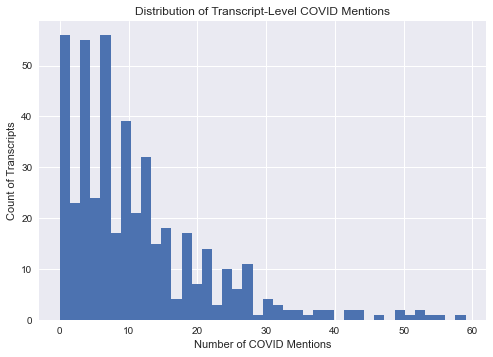

In [9]:
# Distribution of COVID mentions - transcripts
plt.style.use('seaborn')  

plt.hist(covid_counts_transcripts, bins = 40)
plt.xlabel('Number of COVID Mentions')
plt.ylabel('Count of Transcripts')
plt.title('Distribution of Transcript-Level COVID Mentions')

plt.show()

In [13]:
# Lori -- Looked for COVID term counts again using a wider list of terms

all_covid_counts_transcripts = [] # container for transcript covid mention counts
all_covid_counts_sentences = [] # container for sentence covid mention counts

# read in each transcript, do text cleaning, add text and counts to containers
# split sentences on periods, do text cleaning, add text and counts to containers
# text cleaning is done separately for transcripts and sentences to help split sentences better

#### transcripts as documents
for transcript in all_conservative_files: 
    # add to counter if word in text is in the combined covid terms list, add count to container
    for word in corpus_text.split(' '):
        if word in all_covid_terms:
            cov_trans_counter += 1
    all_covid_counts_transcripts.append(cov_trans_counter)
    
    
    #### sentences as documents
    for sentence in text.split('.'): # note that splitting on periods is not perfect for identifying sentences
        
        # create sentence covid counter
        cov_sen_counter = 0
        
        ### string cleaning
        corpus_sen = sentence.replace('\xa0', '')
        # remove all punctuation    
        for c in string.punctuation:
            corpus_sen = corpus_sen.replace(c, "")
        # remove numbers            
        corpus_sen = re.sub('\d+', '', corpus_sen)
        # remove whitespaces
        corpus_sen = " ".join(corpus_sen.split())
        
        # add cleaned sentence to container
        text_sentences.append(corpus_sen)
        
        # add to counter if word in sentence is in covid terms, add count to container
        for word in corpus_sen.split(' '):
            if word in all_covid_terms:
                cov_sen_counter += 1
        all_covid_counts_sentences.append(cov_sen_counter) 

In [14]:
# might be too wide, because now all transcripts are included

print("There are {:,} transcripts that mention COVID at least once.".format(len(text_transcripts) - all_covid_counts_transcripts.count(0)))

There are 458 transcripts that mention COVID at least once.


## Data Pre-Processing

### Spacy Implementation & Removal of Stop Words 
This analysis is useful if we want more control over the corpus of stop words that are used in our analysis

In [ ]:
#Compare spacy implemtation to the sklearn #loads spacy and turns off some aspects 
# import spacy
# nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

## Word-Frequency Analysis

### Use CountVectorizer to get the unique vocabulary list and eliminate stop words

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from operator import itemgetter

In [11]:
# set up count vectorizer function
def countvec(text_list):
    
    # step 1: set up the vectorizer
    vectorizer = CountVectorizer(min_df = 30, 
                                 stop_words = full_stop_words, 
                                 max_df = 0.8)
    
    # step 2: apply the vectorizer to the corpus of documents and store in document matrix X
    X = vectorizer.fit(text_list)
    
    # step 3: fit transform corpus of documents
    X_transformed = vectorizer.fit_transform(text_list)
    
    # step 4: extract feature names and counts, create dictionary
    array_of_words = vectorizer.get_feature_names() # Lori changed from get_featured_names_out() because her version of library doesn't have that function
    array_of_counts = X_transformed.toarray().sum(axis = 0)
    word_frequency_dictionary = dict(zip(array_of_words, array_of_counts))
    
    return(X, X_transformed, array_of_words, array_of_counts, word_frequency_dictionary)

## Apply CountVectorizer and Plot Top Words
Note: need to double-check how the counts are arrived at - is it by document or number of occurences in a given document?

### Full Transcript Set

In [12]:
# apply function to full transcript set
X_trans, X_transformed_trans, array_of_words_trans, array_of_counts_trans, word_frequency_dictionary_trans = countvec(text_transcripts)

In [13]:
# vocabulary length
print("There are {:,} unique words in the vocabulary.".format(len(X_trans.vocabulary_)))

There are 4,079 unique words in the vocabulary.


In [24]:
# set number of top words to see
num_top_words = 10

top_10_words = dict(sorted(word_frequency_dictionary_trans.items(), key = itemgetter(1), reverse = True)[:num_top_words])

print(top_10_words)

{'police': 2669, 'thanks': 1802, 'unidentified': 1747, 'crosstalk': 1735, 'administration': 1647, 'kids': 1617, 'school': 1612, 'black': 1605, 'quote': 1566, 'vaccine': 1556}


In [23]:
#check to see if "coronavirus" is in the dictionary, print index value
vocab = X_trans.vocabulary_

vocab['coronavirus']

814

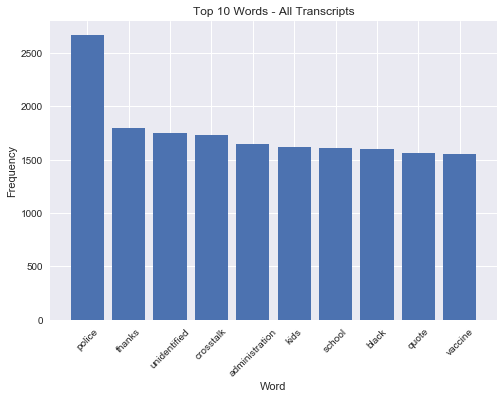

In [25]:
# plot top words
plt.style.use('seaborn')  

x = top_10_words.keys()
y = top_10_words.values()
plt.bar(x,y)
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Top 10 Words - All Transcripts')

plt.show()

### Restricted Transcript Set - Nonzero COVID Mentions

In [26]:
# create a restricted transcript list including only transcripts that mention a COVID term at least one
text_trans_cov = [text_transcripts[i] for i in range(len(text_transcripts)) if covid_counts_transcripts[i] > 0]

In [27]:
# apply function to restricted list
X_trans_cov, X_transformed_trans_cov, array_of_words_trans_cov, array_of_counts_trans_cov, word_frequency_dictionary_trans_cov = countvec(text_trans_cov)

In [28]:
# vocabulary length
print("There are {:,} unique words in the vocabulary.".format(len(X_trans_cov.vocabulary_)))

There are 3,915 unique words in the vocabulary.


In [29]:
# check to see if "coronavirus" is in the dictionary, print index
vocab = X_trans_cov.vocabulary_

vocab['coronavirus']

787

In [30]:
# set the number of top words
num_top_words = 10

top_10_words = dict(sorted(word_frequency_dictionary_trans_cov.items(), key = itemgetter(1), reverse = True)[:num_top_words])

print(top_10_words)

{'police': 2520, 'thanks': 1704, 'unidentified': 1652, 'crosstalk': 1647, 'school': 1574, 'kids': 1553, 'vaccine': 1552, 'black': 1512, 'quote': 1495, 'china': 1463}


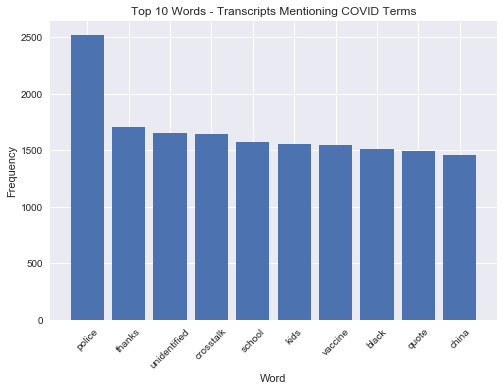

In [32]:
# plot top words
plt.style.use('seaborn')  

x = top_10_words.keys()
y = top_10_words.values()
plt.bar(x,y)
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Top 10 Words - Transcripts Mentioning COVID Terms')

plt.show()

In [31]:
# Lori expanded number of top words to see if that increased number of COVID terms in results.
num_top_words = 20

top_20_words = dict(sorted(word_frequency_dictionary_trans_cov.items(), key = itemgetter(1), reverse = True)[:num_top_words])

print(top_20_words)

{'police': 2520, 'thanks': 1704, 'unidentified': 1652, 'crosstalk': 1647, 'school': 1574, 'kids': 1553, 'vaccine': 1552, 'black': 1512, 'quote': 1495, 'china': 1463, 'crime': 1441, 'coronavirus': 1408, 'border': 1378, 'shes': 1371, 'mask': 1364, 'health': 1332, 'children': 1221, 'virus': 1213, 'federal': 1171, 'governor': 1165}


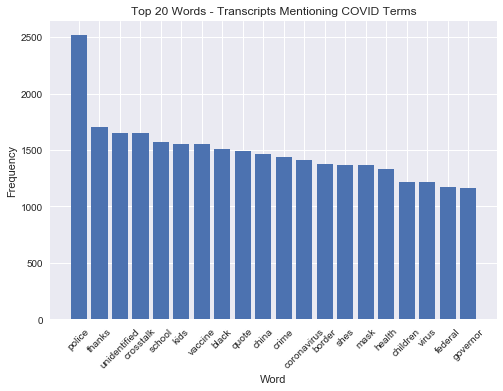

In [35]:
# Lori also plotted top 20 words
plt.style.use('seaborn')  

x = top_20_words.keys()
y = top_20_words.values()
plt.bar(x,y)
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Top 20 Words - Transcripts Mentioning COVID Terms')

plt.show()

### Full Sentence Set

Lori didn't run this part because her computer didn't have enough memory!

In [14]:
# apply function to sentences -- Lori getting a memory error because she only has 8 GiB of RAM on her computer: 
# Unable to allocate 22.2 GiB for an array with shape (525604, 5676) and data type int64
X_sen, X_transformed_sen, array_of_words_sen, array_of_counts_sen, word_frequency_dictionary_sen = countvec(text_sentences)

In [15]:
#check to see if "coronavirus" is in the dictionary, print index
vocab = X_sen.vocabulary_

vocab['coronavirus']

1076

In [16]:
#set the number of top words to see
num_top_words = 10

top_10_words = dict(sorted(word_frequency_dictionary_sen.items(), key = itemgetter(1), reverse = True)[:num_top_words])

print(top_10_words)

{'know': 18242, 'people': 17763, 'like': 15333, 'going': 15149, 'think': 14988, 'just': 14892, 'thats': 13589, 'dont': 12155, 'right': 12146, 'yes': 8878}


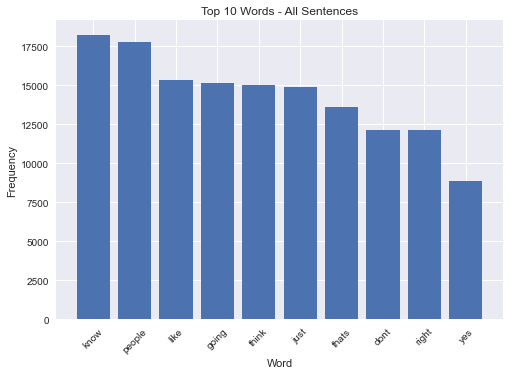

In [17]:
# plot top words
plt.style.use('seaborn')  

x = top_10_words.keys()
y = top_10_words.values()
plt.bar(x,y)
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Top 10 Words - All Sentences')

plt.show()

### Restricted Sentence Set - Nonzero COVID Mentions

In [18]:
# create a restricted transcript list including only transcripts that mention a COVID term at least once
text_sen_cov = [text_sentences[i] for i in range(len(text_sentences)) if covid_counts_sentences[i] > 0]

In [19]:
# apply function to restricted list
X_sen_cov, X_transformed_sen_cov, array_of_words_sen_cov, array_of_counts_sen_cov, word_frequency_dictionary_sen_cov = countvec(text_sen_cov)

In [20]:
# vocabulary length
print("There are {:,} unique words in the vocabulary.".format(len(X_sen_cov.vocabulary_)))

There are 295 unique words in the vocabulary.


In [21]:
# check to see if "coronavirus" is in the dictionary, print index
vocab = X_sen_cov.vocabulary_

vocab['coronavirus']

46

In [22]:
# set the number of top words to see
num_top_words = 10

top_10_words = dict(sorted(word_frequency_dictionary_sen_cov.items(), key = itemgetter(1), reverse = True)[:num_top_words])

print(top_10_words)

{'covid': 2537, 'coronavirus': 1408, 'virus': 1213, 'people': 829, 'know': 481, 'going': 370, 'just': 360, 'new': 318, 'like': 315, 'think': 314}


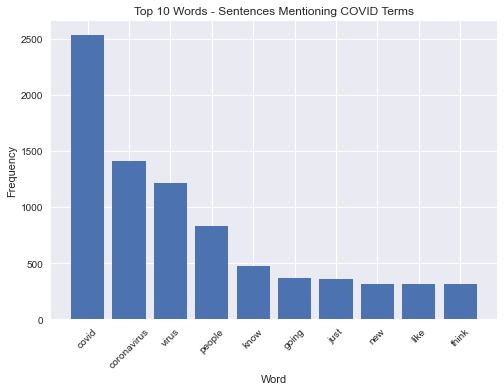

In [23]:
# plot top words
plt.style.use('seaborn')  

x = top_10_words.keys()
y = top_10_words.values()
plt.bar(x,y)
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Top 10 Words - Sentences Mentioning COVID Terms')

plt.show()

## Co-Occurence Analysis

- Need to do string cleaning. 
- For now, appearance anywhere in a transcript increases count by 1.
- it might make sense to do this with the count vectorizer from above?

In [24]:
# import packages
from collections import Counter
import spacy
import numpy as np

## Transcript-Level Co-Occurrence

In [27]:
nlp = spacy.load('en_core_web_sm', disable = ['parser'])

In [28]:
%%time
conservative_nlp = [nlp(text) for text in text_transcripts]

Wall time: 14min 6s


In [31]:
# create counters
lemma_counter = Counter()
covid_co_counter = Counter()
covid_count = 0
mask_co_counter = Counter()
mask_count = 0
vaccine_co_counter = Counter()
vaccine_count = 0

# for each document, add unique lemmas to counter
# increase co-occurrence and covid counter if covid terms overlap lemma set
# same for mask terms, vaccine terms
for transcript in conservative_nlp:
    lemmas = {token.lemma_.lower() for token in transcript}
    lemma_counter.update(lemmas)
    if not lemmas.isdisjoint(set(covid_terms)):
        covid_co_counter.update(lemmas)
        covid_count += 1
    if not lemmas.isdisjoint(set(mask_terms)):
        mask_co_counter.update(lemmas)
        mask_count += 1
    if not lemmas.isdisjoint(set(vaccine_terms)):
        vaccine_co_counter.update(lemmas)
        vaccine_count += 1

In [33]:
# calculate COVID terms PMI
# P(covid)
covid_ratio = covid_count / len(conservative_nlp)

# calculate PMI only for words that co-occur
pmi_covid = list()
for lemma, count in covid_co_counter.items():
    
    lemma_ratio = lemma_counter[lemma] / len(conservative_nlp) # P(lemma)
    co_ratio = covid_co_counter[lemma] / len(conservative_nlp) # P(covid, lemma)
    
    # store lemma, total lemma count, co-occur count, and PMI
    pmi_covid += [(lemma, lemma_counter[lemma], covid_co_counter[lemma], 
                   np.log2(co_ratio / (covid_ratio * lemma_ratio)))]

# sort list of tuples by pmi then by lemma count, descending
pmi_covid_sort = sorted(pmi_covid, key = lambda x: [round(x[3], 5), x[1]], reverse = True)